In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
sns.set_style('whitegrid')

In [5]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


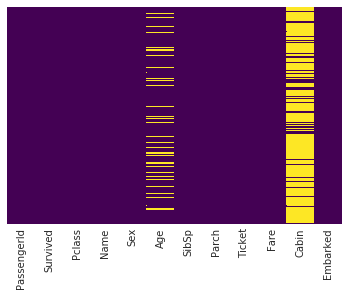

In [8]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

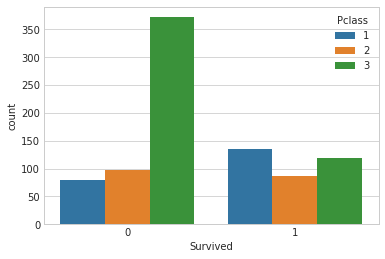

In [9]:
sns.countplot(data=train,x='Survived',hue='Pclass')

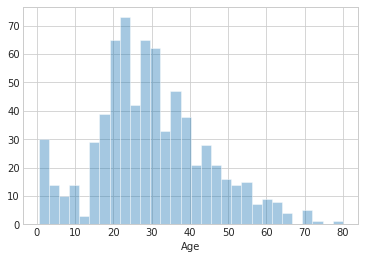

In [10]:
sns.distplot(train['Age'].dropna(), bins=30, kde=False, hist_kws=dict(edgecolor='White', linewidth='1'))

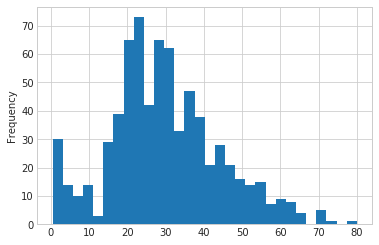

In [11]:
train['Age'].plot.hist(bins=30)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


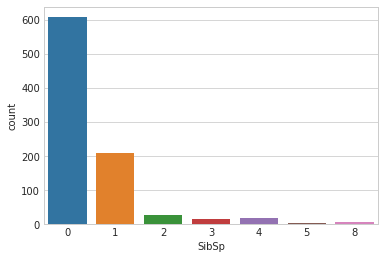

In [13]:
sns.countplot(x='SibSp', data=train)

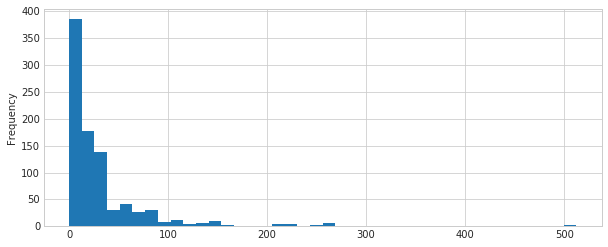

In [14]:
train['Fare'].plot.hist(bins=40, figsize=(10,4))

In [15]:
pclass1 = train.loc[train['Pclass'] == 1]

In [16]:
a=list()


In [17]:
def king(pclass):
    pclass1 = train.loc[train['Pclass'] == pclass]
    
    return int(round(np.mean(pclass1['Age'])))

In [18]:
def impute_cols(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        return king(Pclass)
    else:
        return Age

In [19]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_cols, axis=1)

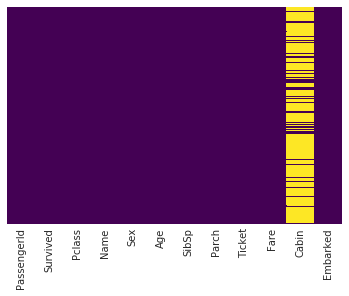

In [20]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [21]:
train.drop('Cabin', axis=1, inplace=True)

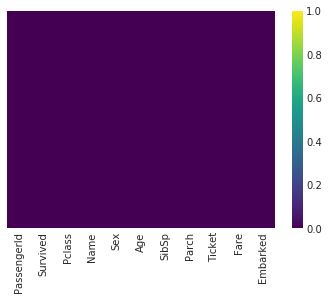

In [22]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

In [23]:
train.dropna(inplace=True)

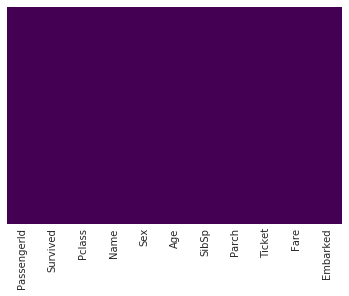

In [24]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [25]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [26]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [27]:
train = pd.concat([train, sex, embark], axis=1)

In [28]:
train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], inplace=True, axis=1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [30]:
train.drop('PassengerId', axis=1, inplace=True)

In [31]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
from sklearn.model_selection import train_test_split

In [40]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()

In [46]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
prediction = logmodel.predict(X_test)

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [51]:
from sklearn.metrics import  confusion_matrix

In [52]:
confusion_matrix(y_test, prediction)

array([[148,  15],
       [ 36,  68]])

In [53]:
test = pd.read_csv('titanic_test.csv')

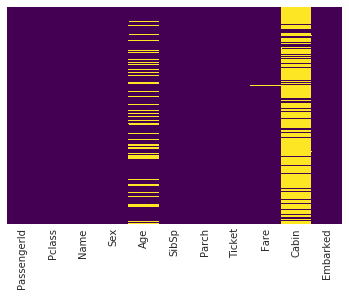

In [56]:
sns.heatmap(test.isnull(),cbar=False, yticklabels=False, cmap='viridis')

In [57]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_cols, axis=1)

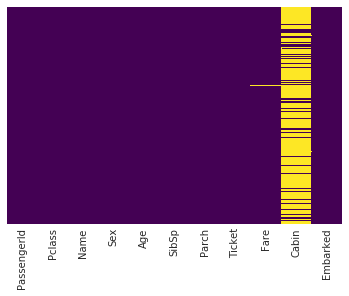

In [58]:
sns.heatmap(test.isnull(),cbar=False, yticklabels=False, cmap='viridis')

In [59]:
test.drop('Cabin', axis=1, inplace=True)

In [60]:
test.dropna(inplace=True)

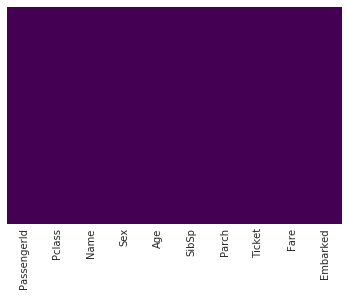

In [61]:
sns.heatmap(test.isnull(),cbar=False, yticklabels=False, cmap='viridis')

In [62]:
tsex = pd.get_dummies(test['Sex'], drop_first=True)

In [63]:
tEmbark = pd.get_dummies(test['Embarked'], drop_first=True)

In [64]:
test = pd.concat([test,tsex,tEmbark], axis=1)

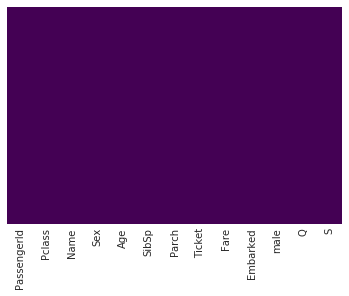

In [65]:
sns.heatmap(test.isnull(),cbar=False, yticklabels=False, cmap='viridis')

In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [67]:
test.drop(['PassengerId', 'Name', 'Ticket', 'Sex', 'Embarked'], inplace=True, axis=1)

In [68]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [69]:
logmodel.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
prediction = logmodel.predict(test)

In [71]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0,